# Some Covid-19 Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
covid_df = pd.read_csv("./data/COVID-19 Cases.csv", header=0)
covid_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
0,3/9/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
1,3/8/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
2,3/7/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
3,3/6/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
4,3/5/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35502 entries, 0 to 35501
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               35502 non-null  object 
 1   Country_Region     35502 non-null  object 
 2   Province_State     15616 non-null  object 
 3   Difference         35502 non-null  int64  
 4   Prep_Flow_Runtime  35502 non-null  object 
 5   Latest_Date        35502 non-null  object 
 6   Case_Type          35502 non-null  object 
 7   Cases              35502 non-null  int64  
 8   Lat                35136 non-null  float64
 9   Long               35136 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.7+ MB


In [10]:
res = covid_df[(covid_df.Difference > 0) & (covid_df.Case_Type == 'Confirmed') &
        (covid_df.Country_Region == 'Italy')]
res.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
28975,3/9/2020,Italy,NaN,1797,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,9172,43.0,12.0
28976,3/8/2020,Italy,NaN,1492,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,7375,43.0,12.0
28977,3/7/2020,Italy,NaN,1247,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,5883,43.0,12.0
28978,3/6/2020,Italy,NaN,778,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,4636,43.0,12.0
28979,3/5/2020,Italy,NaN,769,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,3858,43.0,12.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6fd0ea438>]],
      dtype=object)

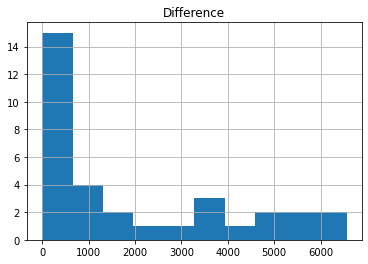

In [16]:
res.sort_values(by='Cases', ascending=False).hist(column='Difference')b

In [17]:
res['Difference'].describe()

count      33.000000
mean     1937.181818
std      2132.965299
min         1.000000
25%       202.000000
50%       778.000000
75%      3526.000000
max      6557.000000
Name: Difference, dtype: float64

In [18]:
res1 = covid_df[(covid_df.Difference > 0) & (covid_df.Case_Type == 'Confirmed') &
               ((covid_df.Country_Region == 'Italy') | (covid_df.Country_Region == 'Spain') |
               (covid_df.Country_Region == 'Germany'))]
res1.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
20191,3/9/2020,Germany,NaN,136,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1176,51.0,9.0
20192,3/8/2020,Germany,NaN,241,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1040,51.0,9.0
20193,3/7/2020,Germany,NaN,129,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,799,51.0,9.0
20194,3/6/2020,Germany,NaN,188,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,670,51.0,9.0
20195,3/5/2020,Germany,NaN,220,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,482,51.0,9.0


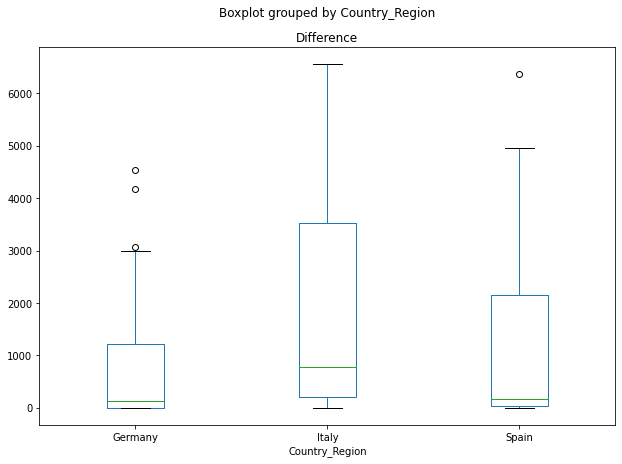

In [21]:
res1.boxplot(by='Country_Region', column=['Difference'], grid=False, 
             figsize=[10,7])

In [23]:
df_de = covid_df[(covid_df.Case_Type == 'Confirmed') & (covid_df.Country_Region == 'Germany')]
df_de.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
20191,3/9/2020,Germany,NaN,136,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1176,51.0,9.0
20192,3/8/2020,Germany,NaN,241,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1040,51.0,9.0
20193,3/7/2020,Germany,NaN,129,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,799,51.0,9.0
20194,3/6/2020,Germany,NaN,188,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,670,51.0,9.0
20195,3/5/2020,Germany,NaN,220,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,482,51.0,9.0


In [24]:
df_it = covid_df[(covid_df.Case_Type == 'Confirmed') & (covid_df.Country_Region == 'Italy')]
df_it.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
28975,3/9/2020,Italy,NaN,1797,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,9172,43.0,12.0
28976,3/8/2020,Italy,NaN,1492,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,7375,43.0,12.0
28977,3/7/2020,Italy,NaN,1247,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,5883,43.0,12.0
28978,3/6/2020,Italy,NaN,778,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,4636,43.0,12.0
28979,3/5/2020,Italy,NaN,769,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,3858,43.0,12.0


Text(0, 0.5, 'Italy Cases')

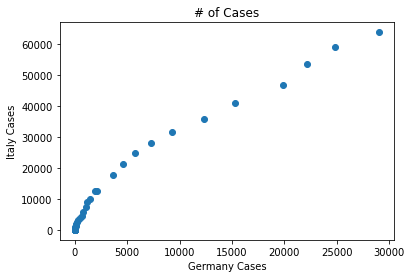

In [34]:
plt.scatter(df_de['Cases'], df_it['Cases'])
plt.title("# of Cases")
plt.xlabel('Germany Cases')
plt.ylabel('Italy Cases')